## Assignment - Advanced Regression

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

### Importing Required Libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error

warnings.filterwarnings('ignore')

### Reading train.csv file using Pandas read_csv module

In [2]:
df = pd.read_csv("train.csv")

### Getting Info about the dataset

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Analysing the Output Variable

In [6]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.8828757597682129


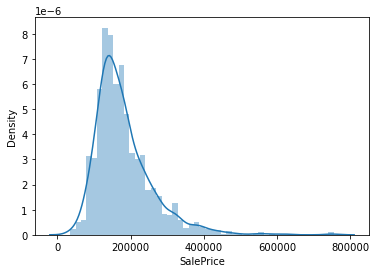

In [7]:
print ("Skew is:", df.SalePrice.skew())
sns.distplot(df.SalePrice)
plt.show()

Skew for log is: 0.12133506220520406


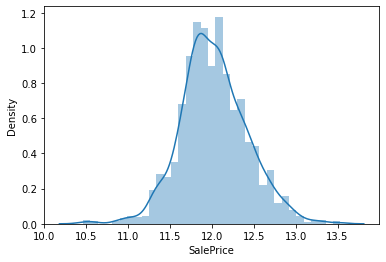

In [8]:
print ("Skew for log is:", np.log(df.SalePrice).skew())
sns.distplot(np.log(df.SalePrice))
plt.show()

Since Skew value for log function is close to 0 we will consider log(Saleprice) as our target variable. Also the graph looks Normally Distributed 

### Working with Numeric Features

Selecting Numeric Variable

In [9]:
numeric = df.select_dtypes(include=[np.number])
numeric.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [10]:
corr = numeric.corr()
print("\nTop 5 Most Correlated Values\n")
print (corr['SalePrice'].sort_values(ascending=False)[:5])
print("\nTop 5 Least Correlated Values\n")
print (corr['SalePrice'].sort_values(ascending=False)[-5:])


Top 5 Most Correlated Values

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

Top 5 Least Correlated Values

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


### Plotting Graphs and Analysing the Dataset

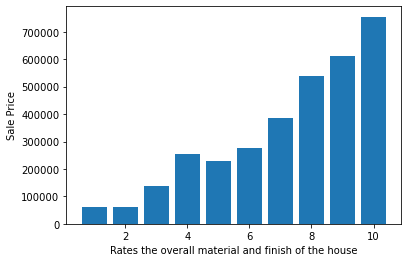

In [11]:
plt.bar(df['OverallQual'], (df.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('Rates the overall material and finish of the house')
plt.show()

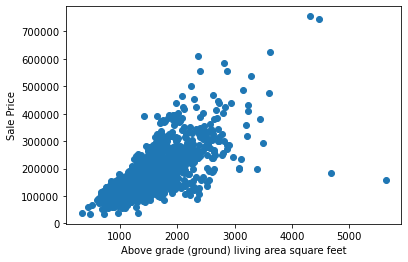

In [12]:
plt.scatter(x=df['GrLivArea'], y=(df.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

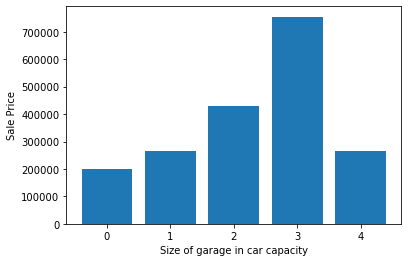

In [13]:
plt.bar(df['GarageCars'],(df.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('Size of garage in car capacity')
plt.show()

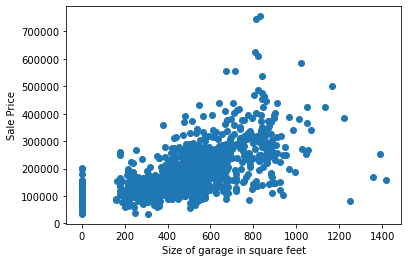

In [14]:
plt.scatter(x=df['GarageArea'], y=(df.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('Size of garage in square feet')
plt.show()

We can observe that there are some outliers in the data. We will consider only values where garage area is less that 1200 sq feet

In [15]:
df = df[df["GarageArea"]<1200]

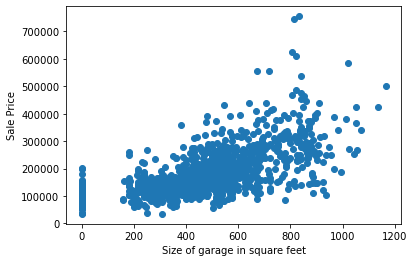

In [16]:
plt.scatter(x=df['GarageArea'], y=(df.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('Size of garage in square feet')
plt.show()

In [17]:
round(df.isnull().sum()/len(df.index),2).sort_values(ascending=False).head(25)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageType      0.06
GarageCond      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
BsmtFinType1    0.03
BsmtExposure    0.03
BsmtCond        0.03
BsmtQual        0.03
BsmtFinType2    0.03
MasVnrArea      0.01
MasVnrType      0.01
Exterior2nd     0.00
Exterior1st     0.00
OverallCond     0.00
ExterQual       0.00
ExterCond       0.00
Foundation      0.00
RoofMatl        0.00
dtype: float64

In [18]:
round(df.isnull().sum()/len(df.index),2)[round(df.isnull().sum()/len(df.index),2).values>0.10]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [19]:
df["LotFrontage"].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [20]:
df["Alley"].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [21]:
df["FireplaceQu"].value_counts()

Gd    377
TA    312
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [22]:
df["PoolQC"].value_counts()

Ex    2
Gd    2
Fa    2
Name: PoolQC, dtype: int64

In [23]:
df["Fence"].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [24]:
df["MiscFeature"].value_counts()

Shed    48
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [25]:
df.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [26]:
df.drop(labels='Id',axis=1,inplace=True)

### Working with Categorical Variables

Selecting Categorical Variables

In [27]:
categoricals = df.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,...,1454,1455,1455,1374,1374,1374,1374,1455,1455,1455
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1147,1450,921,1309,1454,1048,1378,225,1257,1441,...,1329,733,1355,867,605,1306,1321,1335,1266,1196


Analysing Data were in Categorical Varibales where one value is present for more that 90% of dataset

In [28]:
des = categoricals.describe().T
des["Occupied By top"] = (des["freq"]/des["count"])
des = des[des["Occupied By top"]>0.9]

In [29]:
des

,count,unique,top,freq,Occupied By top
Street,1455,2,Pave,1450,0.996564
Utilities,1455,2,AllPub,1454,0.999313
LandSlope,1455,3,Gtl,1378,0.947079
Condition2,1455,8,Norm,1441,0.990378
RoofMatl,1455,7,CompShg,1430,0.982818
BsmtCond,1418,4,TA,1306,0.921016
Heating,1455,6,GasA,1423,0.978007
CentralAir,1455,2,Y,1360,0.934708
Electrical,1454,5,SBrkr,1329,0.91403
Functional,1455,7,Typ,1355,0.931271


Plotting Graphs of Variables which occupy maximum portion of Dataset

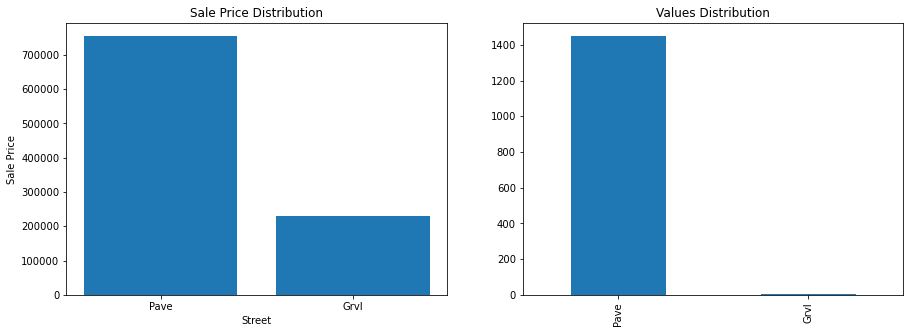

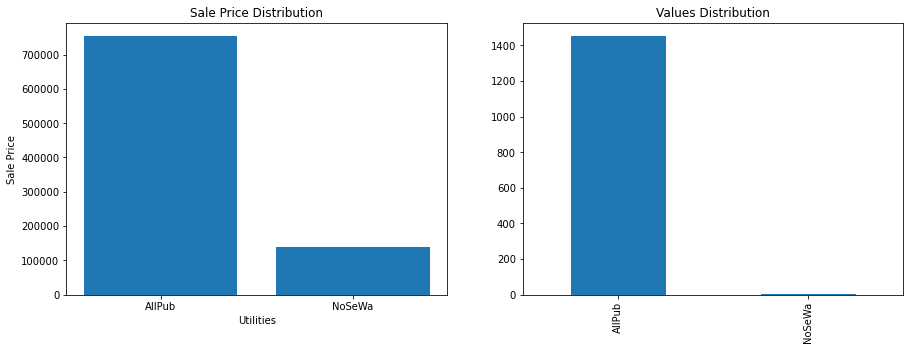

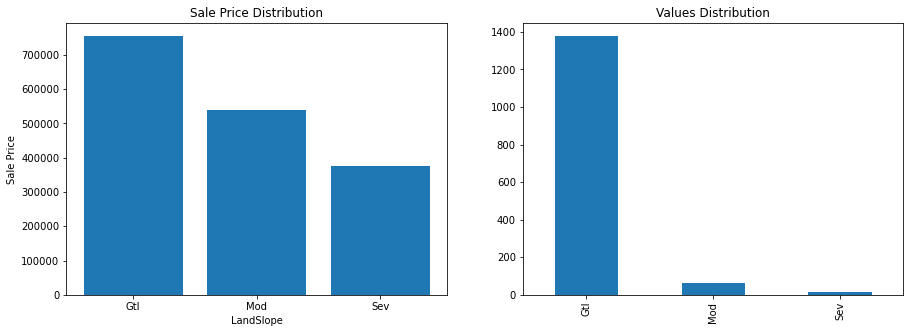

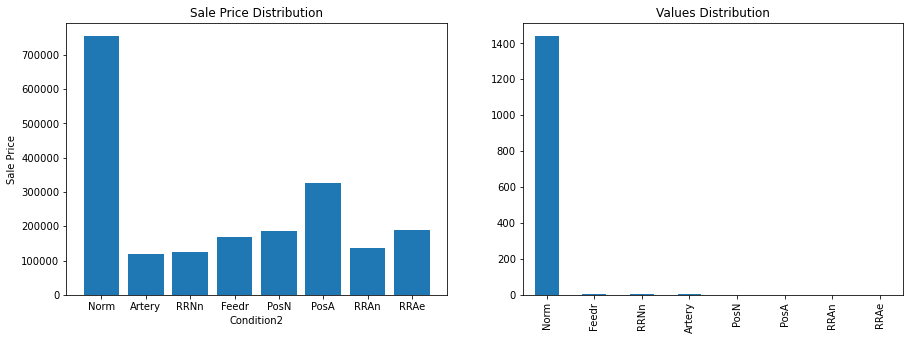

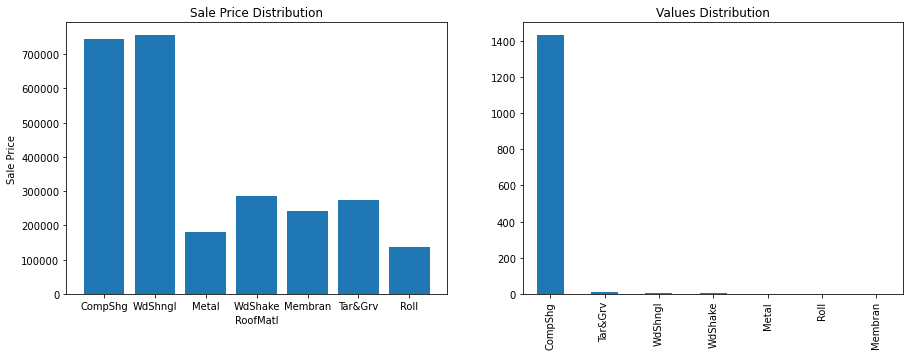

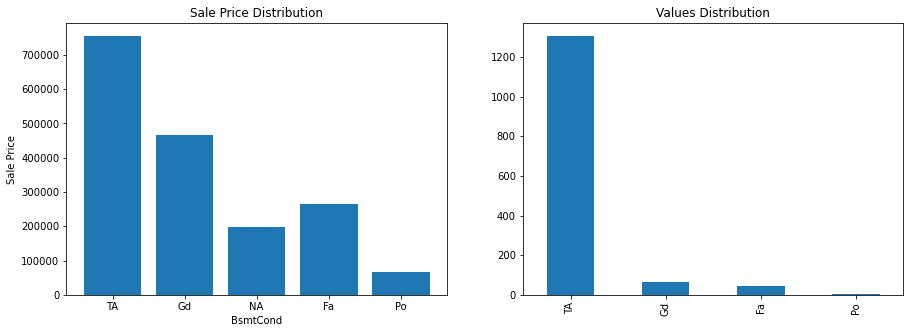

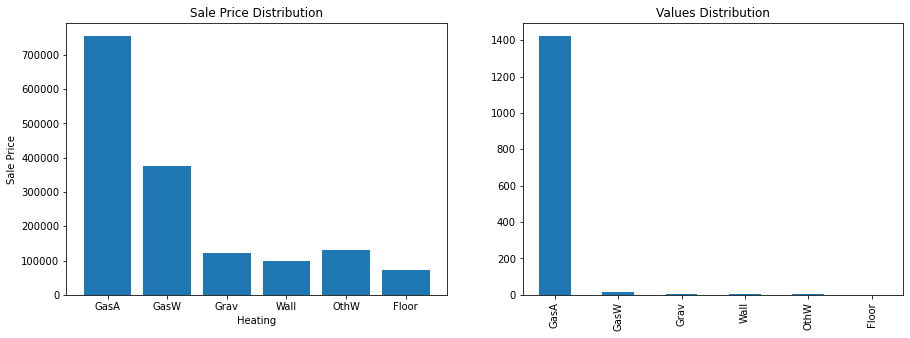

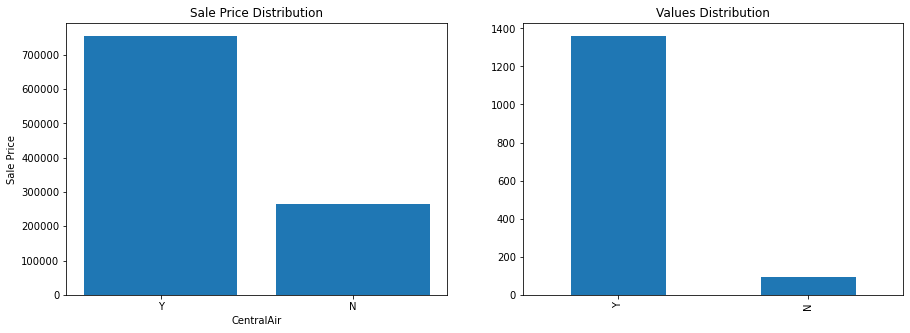

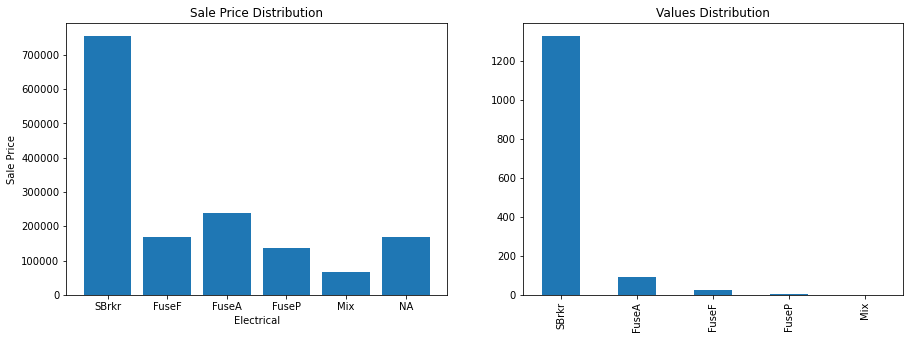

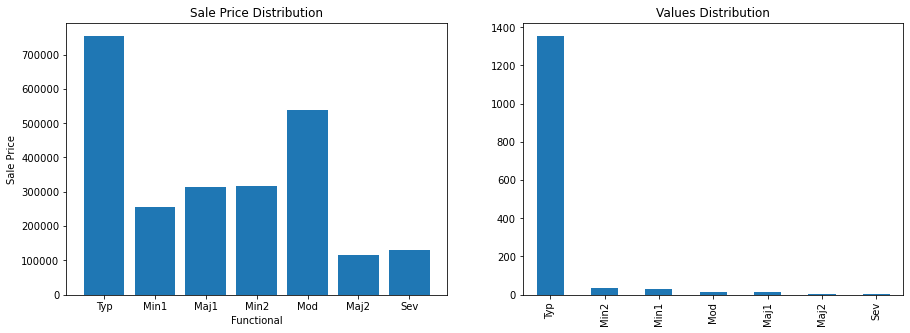

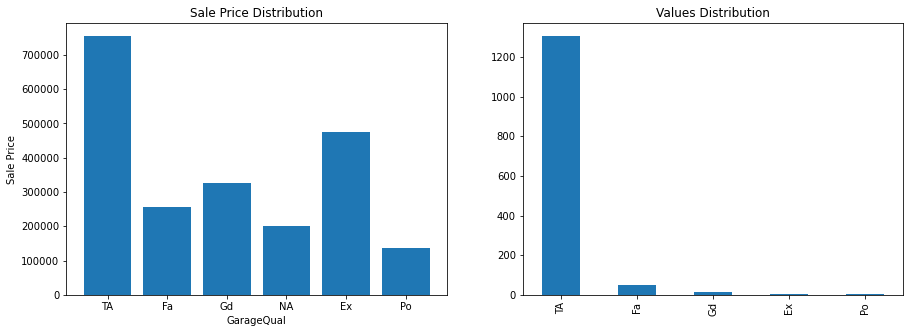

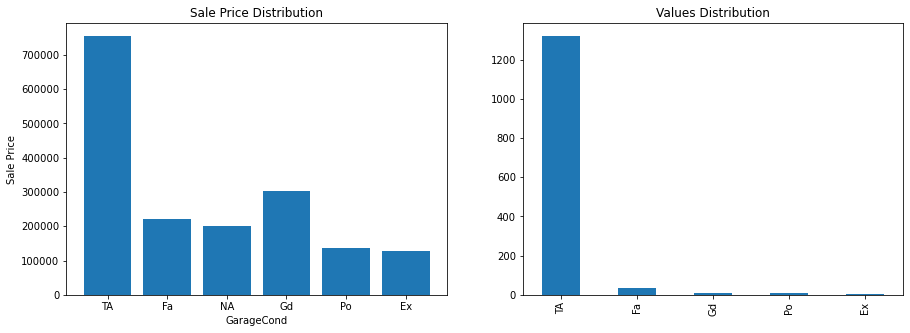

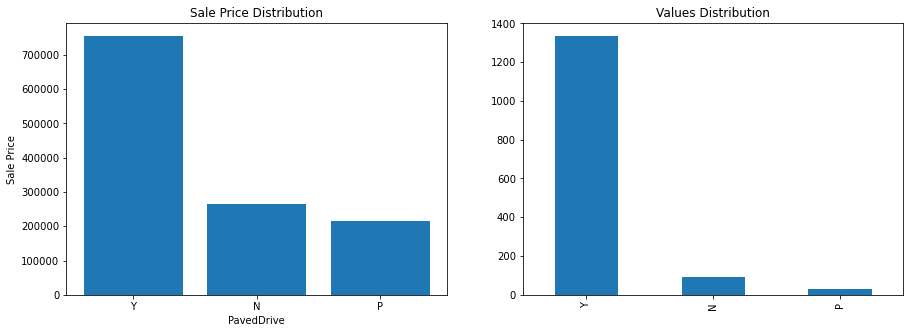

In [30]:
for i in des.index.values:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.title("Sale Price Distribution")
    plt.bar(df[i].fillna("NA"), (df.SalePrice))
    plt.ylabel('Sale Price')
    plt.xlabel(i)
    plt.subplot(1,2,2)
    plt.title("Values Distribution")
    df[i].value_counts().plot(kind='bar')
    plt.show()
    

In [31]:
df["MSZoning"].value_counts()

RL         1147
RM          218
FV           65
RH           16
C (all)       9
Name: MSZoning, dtype: int64

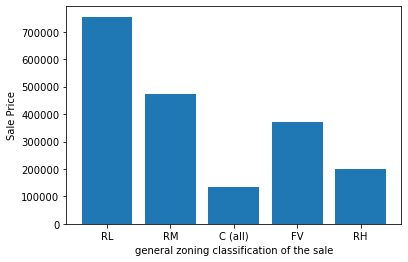

In [32]:
plt.bar(df["MSZoning"],(df.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('general zoning classification of the sale')
plt.show()

Plotting Correlation Heat map

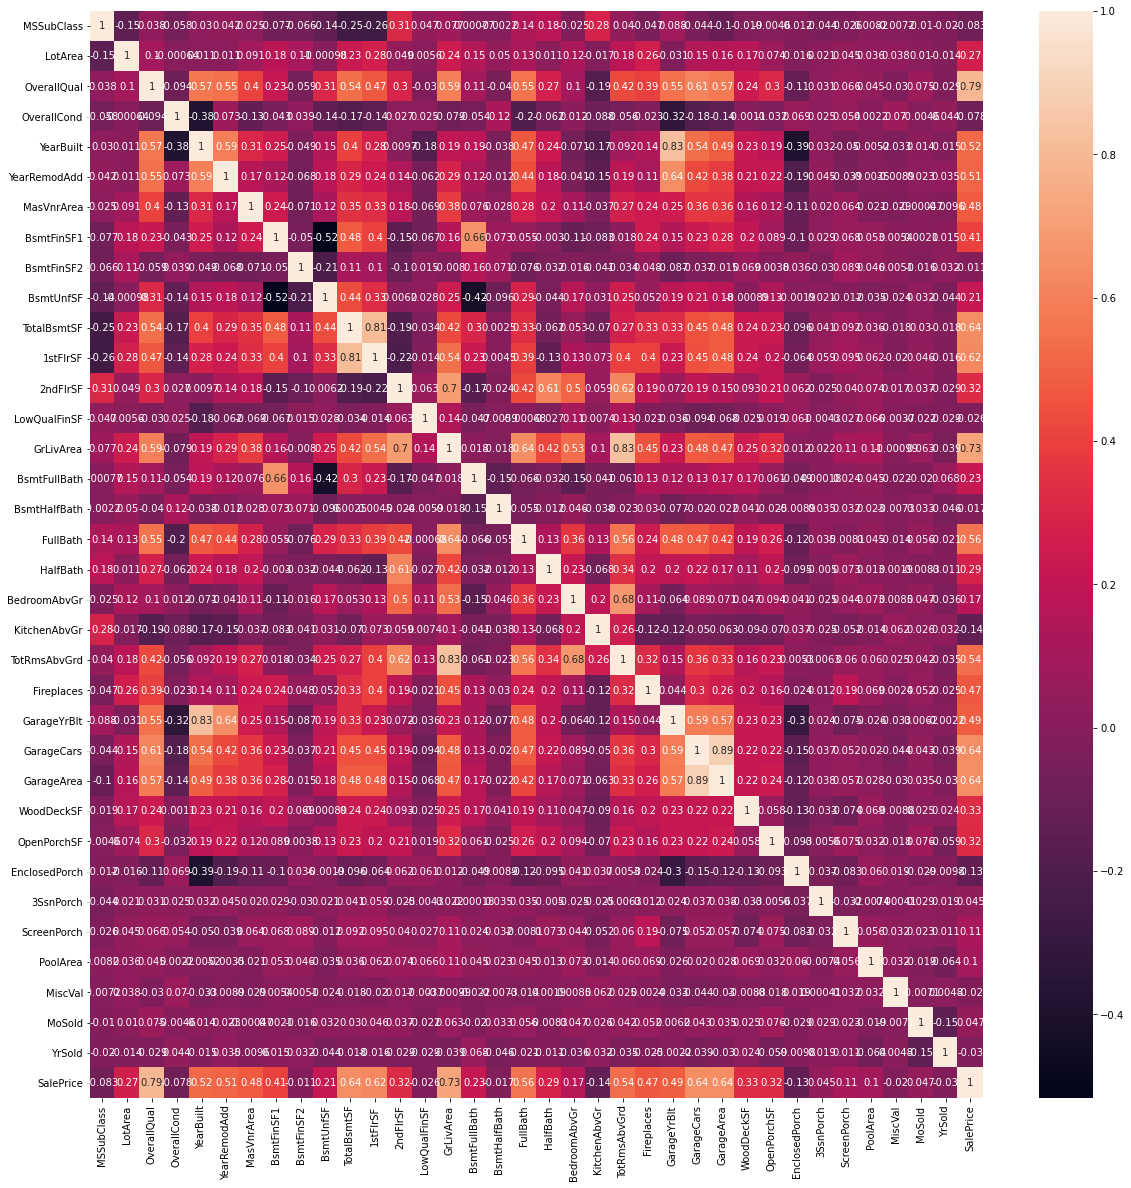

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [34]:
df.shape

(1455, 74)

In [35]:
## Getting List of Numeric columns
numeric_columns = list(df.select_dtypes(include=[np.number]).columns)

In [36]:
len(numeric_columns)

36

In [37]:
## Removing Outliers from data
def remove_outliers(x):
    list = []
    for col in numeric_columns:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df = remove_outliers(df)

In [38]:
df.shape

(1349, 74)

In [39]:
## Getting list of categorical column
categorical_columns = (df.select_dtypes(exclude=[np.number]).columns)

In [40]:
len(categorical_columns)

38

Finding Null Values

In [41]:
df.isnull().sum()[(df.isnull().sum()).values>0]

BsmtQual        30
BsmtCond        30
BsmtExposure    31
BsmtFinType1    30
BsmtFinType2    31
Electrical       1
dtype: int64

Dropping Null Values as the amount is very less

In [42]:
df = df.dropna()

In [43]:
df.isnull().sum()[(df.isnull().sum()).values>0]

Series([], dtype: int64)

In [44]:
df.shape

(1316, 74)

Converting Categorical variable into their corresponding dummy variables

In [45]:
dummies = pd.get_dummies(df[categorical_columns],drop_first=True)

In [46]:
dummies.shape

(1316, 189)

In [47]:
finaldf = pd.concat([df,dummies],axis=1)

Dropping categorical variables which are now converted into the dummy variables

In [48]:
finaldf.drop(categorical_columns,inplace=True,axis=1)

In [49]:
finaldf.shape

(1316, 225)

### Converting Sale price to Log scale

In [50]:
finaldf["SalePrice_log"] = np.log(finaldf["SalePrice"])
finaldf.drop("SalePrice",inplace=True,axis=1)
numeric_columns.remove("SalePrice")

## Model Preparation

### Spilliting the data

In [51]:
df_train,df_test = train_test_split(finaldf,train_size=0.7,test_size=0.3,random_state=42)

Using Standard Scaler to scale numeric values in dataset

In [52]:
scaler = StandardScaler()
df_train[numeric_columns] = scaler.fit_transform(df_train[numeric_columns])
df_test[numeric_columns] = scaler.transform(df_test[numeric_columns])

### Splitting Dependent and Independent Variable
Splitting Test and Train dataset further into X and Y

In [53]:
y_train = df_train.pop('SalePrice_log')
X_train = df_train

In [54]:
y_test = df_test.pop('SalePrice_log')
X_test = df_test

### LinearRegression Model with Feature Elimination using RFE

In [55]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,100)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=100)

In [56]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score Train :",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score Test :",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS Train :",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS Test :",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE Train :",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE Test :",mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 Score Train : 0.9616080844353295
R2 Score Test : -29989389246837.285
RSS Train : 4.863536596819513
RSS Test : 1719081813967101.8
MSE Train : 0.00528071291728503
MSE Test : 4352105858144.5615


##### By Analysing the R2 score we can conclude that model is Overfitting

### Plotting Predicted vs Actual Data

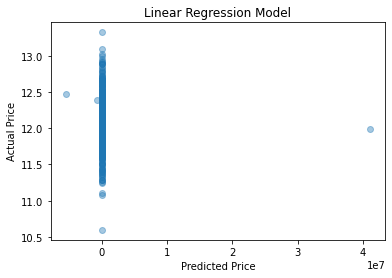

In [57]:
plt.scatter(y_pred_test, y_test, alpha=0.4)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

### RFE Feature Elimination

In [58]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

### Running Linear Regression Model Again

In [59]:
lm  = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [60]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score Train :",r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score Test :",r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS Train :",rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS Test :",rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE Train :",mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE Test :",mse_test_lr)
metric4.append(mse_test_lr**0.5)

R2 Score Train : 0.9428600506885736
R2 Score Test : -2.8934978507202515e+21
RSS Train : 7.238561309826104
RSS Test : 1.6586398252343517e+23
MSE Train : 0.007859458534013142
MSE Test : 4.199088165150257e+20


##### Running Feature Elimination reduced R2 score but model is still overfitting

## Ridge and Lasso Regression

Let's now try predicting House Prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [61]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    1.5s finished


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
# Best Value of Alpha
ridgebest = model_cv.best_params_["alpha"]
print(model_cv.best_params_)

{'alpha': 0.2}


In [63]:
alpha = model_cv.best_params_["alpha"]
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 3.96494447e-02  6.30995407e-02  4.61625794e-02  6.03328283e-02
  3.67635705e-02  7.33491095e-03 -9.30630036e-05  4.43871096e-02
  5.00482599e-02  5.48865676e-02  4.50993256e-03  8.51783562e-02
  0.00000000e+00  3.47687031e-01  2.90156142e-01  3.17049438e-01
  2.38400619e-01  2.01698380e-01 -4.02449071e-02  8.76824224e-02
  1.42301421e-01 -6.11897797e-02  4.72683669e-02 -1.52153951e-01
  6.37890397e-02  4.26870216e-02  4.20234765e-02  5.86758930e-02
 -2.38962553e-03 -8.34997207e-02  4.89209942e-02  1.32302117e-01
  1.83893940e-01 -1.49228572e+00 -1.17845270e-01  1.04312974e-01
  0.00000000e+00  0.00000000e+00  1.31855640e-01  3.49920782e-02
 -3.71217502e-02 -3.56987653e-01  7.81239382e-02 -4.04600870e-02
  9.84352803e-02  6.35254761e-02  3.11728358e-02  1.64538385e-02
 -4.04600870e-02  6.72209716e-02  3.15916957e-02  0.00000000e+00
  4.27728696e-02  7.38580644e-02  5.52553631e-02  2.09656894e-02
  6.84369555e-02  4.98112250e-02  9.97572447e-02 -1.05249683e-03
 -1.01477937e-01 -8.13635

In [64]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score Train :",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score Test :",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS Train :",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS Test :",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE Train :",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE Test :",mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 Score Train : 0.9453252120851504
R2 Score Test : 0.8894648886665988
RSS Train : 6.926271534935291
RSS Test : 6.336204386626917
MSE Train : 0.007520381688311933
MSE Test : 0.016041023763612446


##### By Analysing the above scores we can observe that model is not overfitting and our R2 score on Test data is Significantaly better than just simple Linear Regression

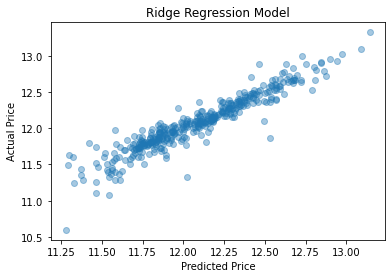

In [65]:
plt.scatter(y_pred_test, y_test, alpha=0.4)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Ridge Regression Model')
plt.show()

## Lasso Regression

In [66]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    1.7s finished


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
lassobest = model_cv.best_params_["alpha"]
print(model_cv.best_params_)

{'alpha': 0.0001}


In [68]:
alpha = model_cv.best_params_["alpha"]
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [69]:
print(lasso.coef_)

[ 4.05612618e-02  6.73436785e-02  4.81632006e-02  6.32297176e-02
  3.79430005e-02  7.12403798e-03 -0.00000000e+00  4.38368592e-02
  8.41578221e-02  9.35701958e-02  8.70359643e-03  4.15736766e-02
  0.00000000e+00  2.81192825e-01  2.20165064e-01  2.51051945e-01
  1.76170644e-01  1.74809545e-01 -3.05584593e-02  7.83849598e-02
  1.34880087e-01 -5.47073827e-02  1.69237768e-02 -1.44147472e-01
  5.57990785e-02  2.06463663e-02  4.31278595e-02  3.35011546e-02
  9.08239152e-03 -7.41487503e-02  0.00000000e+00  8.37044094e-02
  1.54871152e-01 -1.78684668e+00 -1.08172148e-01  7.64823580e-02
  0.00000000e+00  0.00000000e+00  6.12713454e-02  0.00000000e+00
 -1.15750696e-02 -3.08165016e-01  6.94118195e-02 -8.01012621e-03
  0.00000000e+00  4.15093752e-02  0.00000000e+00  0.00000000e+00
 -2.34482035e-05  4.50224775e-02  7.02968790e-03  0.00000000e+00
  2.18193934e-02  4.96390265e-02  3.30794559e-02 -0.00000000e+00
  2.84681289e-02  1.32320354e-02  6.15182138e-02  3.42728166e-02
 -2.29697852e-02 -3.97085

In [70]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score Train",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score Test",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS Train",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS Test",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE Train",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE Test",mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 Score Train 0.9439465853050342
R2 Score Test 0.8943368253106945
RSS Train 7.100917725411423
RSS Test 6.056930353577121
MSE Train 0.0077100083880688635
MSE Test 0.015334000895131952


##### By Analysing the above scores we can observe that model is not overfitting and our R2 score on Test data is Significantaly better than just simple Linear Regression and Ridge Regression.

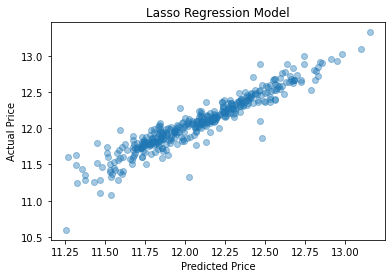

In [71]:
actual_values = y_test
plt.scatter(y_pred_test, actual_values, alpha=0.4)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Lasso Regression Model')
plt.show()

In [72]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
lr_rfe_metric = pd.Series(metric4, name = 'Linear Regression after RFE')
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric,lr_rfe_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Linear Regression after RFE,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.616081e-01,9.428601e-01,0.945325,0.943947
1,R2 Score (Test),-2.998939e+13,-2.893498e+21,0.889465,0.894337
2,RSS (Train),4.863537e+00,7.238561e+00,6.926272,7.100918
3,RSS (Test),1.719082e+15,1.658640e+23,6.336204,6.056930
4,MSE (Train),7.266851e-02,8.865359e-02,0.086720,0.087807
5,MSE (Test),2.086170e+06,2.049168e+10,0.126653,0.123831


## Lets observe the changes in the coefficients after regularization

In [73]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(50)

,Linear,Ridge,Lasso
LotArea,4.183557e-02,0.039649,0.040561
OverallQual,6.525638e-02,0.063100,0.067344
OverallCond,4.932847e-02,0.046163,0.048163
YearBuilt,6.806457e-02,0.060333,0.063230
BsmtFinSF1,-3.215893e+12,0.036764,0.037943
BsmtFinSF2,-1.164091e+12,0.007335,0.007124
BsmtUnfSF,-3.246432e+12,-0.000093,-0.000000
TotalBsmtSF,2.849117e+12,0.044387,0.043837
1stFlrSF,1.655347e+12,0.050048,0.084158
2ndFlrSF,1.908751e+12,0.054887,0.093570


### As we can analyse Lasso Regression is giving better R2 value on test data and Lasso Regression also does Feature elimination, hence we will be considering Lasso Regression for our final model.

In [74]:
finalmodel = betas[['Lasso']]
finalmodel = finalmodel[finalmodel['Lasso']!=0]

In [75]:
len(finalmodel)

82

### Finding Residual Value

In [76]:
x = pd.DataFrame()

In [77]:
x["Predicted Test"] = y_pred_test
x["Actual Test"] = y_test.values
x["Predicted_exp"] =  np.exp(x["Predicted Test"])
x["Actual_exp"]=np.exp(x["Actual Test"])

In [78]:
x["diff"] = (round((x["Actual Test"]-x["Predicted Test"])/x["Actual Test"],2))*100
x["diff1"] = (round((x["Actual_exp"]-x["Predicted_exp"])/x["Actual_exp"],2))*100

In [79]:
x[x["diff"].isin([x["diff"].min(),x["diff"].max()])]

,Predicted Test,Actual Test,Predicted_exp,Actual_exp,diff,diff1
46,11.270373,11.608236,78462.268074,110000.0,3.0,29.0
90,11.451978,11.790557,94087.265788,132000.0,3.0,29.0
117,11.596151,11.979385,108678.679358,159434.0,3.0,32.0
166,11.255632,10.596635,77314.113936,40000.0,-6.0,-93.0
259,11.316336,11.626254,82152.798998,112000.0,3.0,27.0
357,12.022125,11.320554,166395.863218,82500.0,-6.0,-102.0
371,12.467318,12.879017,259709.298774,392000.0,3.0,34.0


In [80]:
x[x["diff1"].isin([x["diff1"].min(),x["diff1"].max()])]

,Predicted Test,Actual Test,Predicted_exp,Actual_exp,diff,diff1
357,12.022125,11.320554,166395.863218,82500.0,-6.0,-102.0
371,12.467318,12.879017,259709.298774,392000.0,3.0,34.0


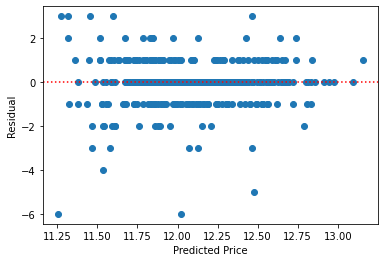

In [81]:
plt.scatter( x["Predicted Test"] , x["diff"])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.show()

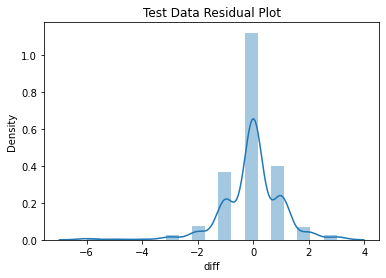

In [82]:
plt.title("Test Data Residual Plot")
sns.distplot(x["diff"])
plt.show()

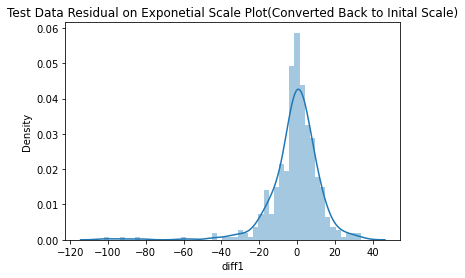

In [83]:
plt.title("Test Data Residual on Exponetial Scale Plot(Converted Back to Inital Scale)")
sns.distplot(x["diff1"])
plt.show()

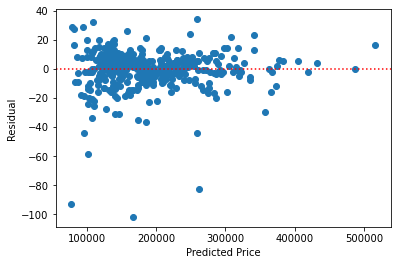

In [84]:
plt.scatter( x["Predicted_exp"] , x["diff1"])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.show()

### Also from Analysing Residual Plots, We can conclude that Lasso Regression can be considered as the final model

In [85]:
print("Best Lambda Value for Ridge Regression =",ridgebest)
print("Best Lambda Value for Lasso Regression =",lassobest)

Best Lambda Value for Ridge Regression = 0.2
Best Lambda Value for Lasso Regression = 0.0001
